In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from random import gauss
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from random import random
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

In [2]:
# general settings
class CFG:
    # data_folder = '../input/tsdata-1/'
    data_folder = 'data/' # where the data is stored
    img_dim1 = 40  # width image for matplotlib
    img_dim2 = 20  # height image for matplotlib
    line_width = 5 # line width for matplotlib
    
    
# adjust the parameters for displayed figures    
plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})   
plt.rcParams['lines.linewidth'] = CFG.line_width  

In [21]:
df = pd.read_csv(CFG.data_folder + 'aranet_22.csv')
df.head()

,Time(dd/mm/yyyy),Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
0,20/07/2022 3:20:03 PM,1179,26.6,43,1022
1,20/07/2022 3:25:03 PM,559,26.6,44,1022
2,20/07/2022 3:30:03 PM,564,26.0,44,1022
3,20/07/2022 3:35:03 PM,580,25.6,44,1022
4,20/07/2022 3:40:03 PM,559,25.2,44,1022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time(dd/mm/yyyy)           3942 non-null   object 
 1   Carbon dioxide(ppm)        3942 non-null   int64  
 2   Temperature(°C)            3942 non-null   float64
 3   Relative humidity(%)       3942 non-null   int64  
 4   Atmospheric pressure(hPa)  3942 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 154.1+ KB


In [5]:
df.columns

Index(['Time(dd/mm/yyyy)', 'Carbon dioxide(ppm)', 'Temperature(°C)',
       'Relative humidity(%)', 'Atmospheric pressure(hPa)'],
      dtype='object')

In [24]:
df["date"] = pd.to_datetime(df["Time(dd/mm/yyyy)"], format='%d/%m/%Y %H:%M:%S %p')
df.head()

,Time(dd/mm/yyyy),Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa),date
0,20/07/2022 3:20:03 PM,1179,26.6,43,1022,2022-07-20 03:20:03
1,20/07/2022 3:25:03 PM,559,26.6,44,1022,2022-07-20 03:25:03
2,20/07/2022 3:30:03 PM,564,26.0,44,1022,2022-07-20 03:30:03
3,20/07/2022 3:35:03 PM,580,25.6,44,1022,2022-07-20 03:35:03
4,20/07/2022 3:40:03 PM,559,25.2,44,1022,2022-07-20 03:40:03


In [25]:
df.sort_values(by=['date']).tail()

,Time(dd/mm/yyyy),Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa),date
3855,03/08/2022 12:39:43 AM,831,24.6,59,1016,2022-08-03 12:39:43
3856,03/08/2022 12:44:43 AM,833,24.6,59,1016,2022-08-03 12:44:43
3857,03/08/2022 12:49:43 AM,813,24.6,59,1016,2022-08-03 12:49:43
3858,03/08/2022 12:54:43 AM,817,24.6,59,1016,2022-08-03 12:54:43
3859,03/08/2022 12:59:43 AM,841,24.6,59,1016,2022-08-03 12:59:43


In [26]:
df.sort_values(by=['date']).head()

,Time(dd/mm/yyyy),Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa),date
0,20/07/2022 3:20:03 PM,1179,26.6,43,1022,2022-07-20 03:20:03
1,20/07/2022 3:25:03 PM,559,26.6,44,1022,2022-07-20 03:25:03
2,20/07/2022 3:30:03 PM,564,26.0,44,1022,2022-07-20 03:30:03
3,20/07/2022 3:35:03 PM,580,25.6,44,1022,2022-07-20 03:35:03
4,20/07/2022 3:40:03 PM,559,25.2,44,1022,2022-07-20 03:40:03


In [27]:
df.set_index("date", inplace=True)
df.head()

,Time(dd/mm/yyyy),Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
date,,,,,
2022-07-20 03:20:03,20/07/2022 3:20:03 PM,1179,26.6,43,1022
2022-07-20 03:25:03,20/07/2022 3:25:03 PM,559,26.6,44,1022
2022-07-20 03:30:03,20/07/2022 3:30:03 PM,564,26.0,44,1022
2022-07-20 03:35:03,20/07/2022 3:35:03 PM,580,25.6,44,1022
2022-07-20 03:40:03,20/07/2022 3:40:03 PM,559,25.2,44,1022


In [28]:
df = df[df.columns[1:]] # remove the first column
df.head()

,Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
date,,,,
2022-07-20 03:20:03,1179,26.6,43,1022
2022-07-20 03:25:03,559,26.6,44,1022
2022-07-20 03:30:03,564,26.0,44,1022
2022-07-20 03:35:03,580,25.6,44,1022
2022-07-20 03:40:03,559,25.2,44,1022


In [29]:
df.to_excel(CFG.data_folder+"aranet_22.xlsx")

<AxesSubplot:xlabel='date'>

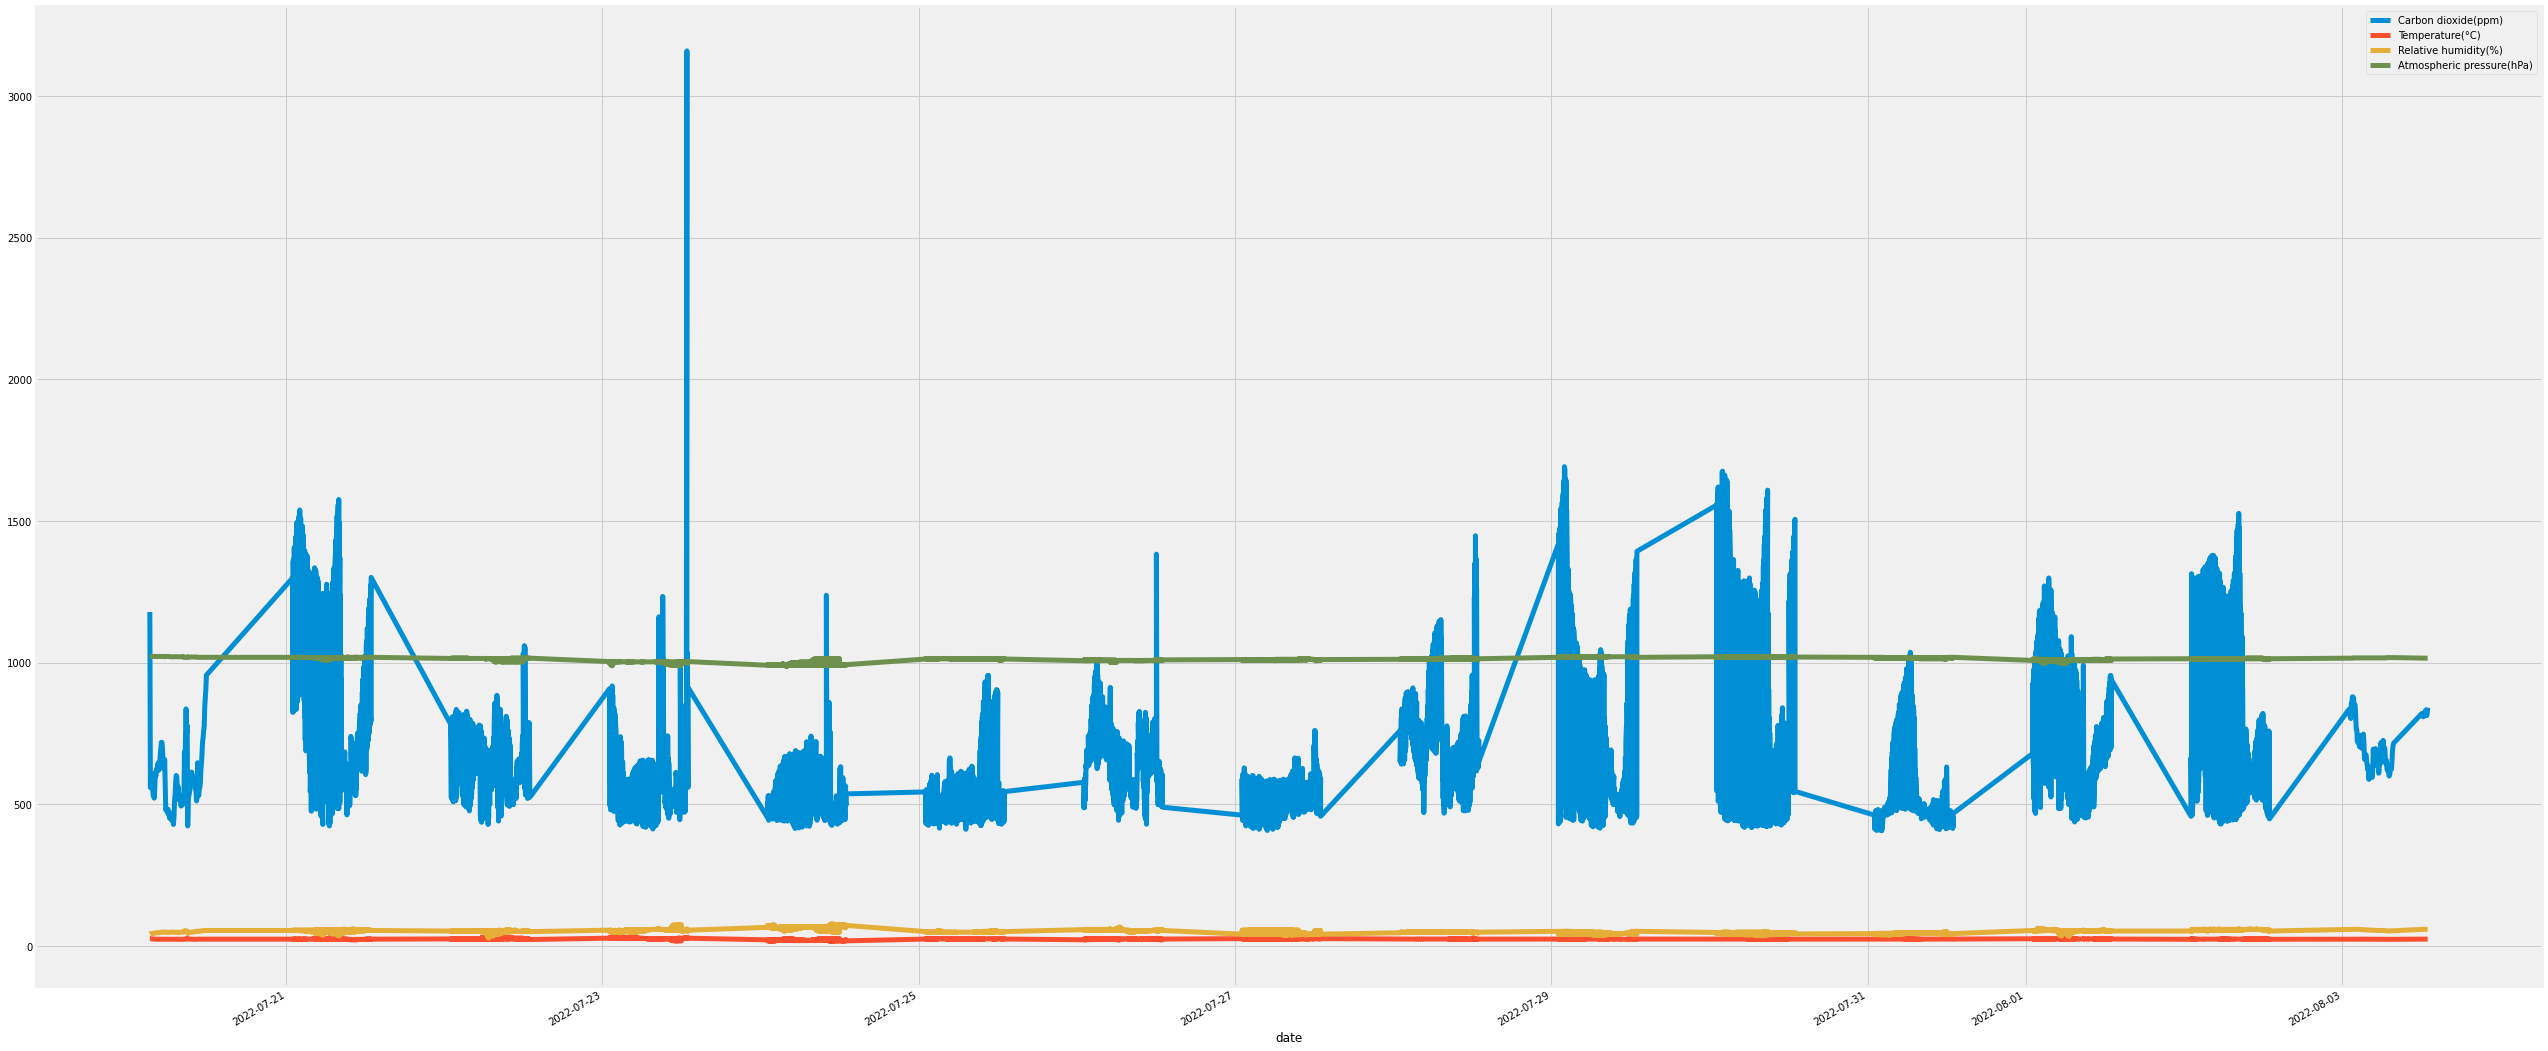

In [30]:
df.plot(figsize=(CFG.img_dim1,CFG.img_dim2))

In [31]:
df.columns

Index(['Carbon dioxide(ppm)', 'Temperature(°C)', 'Relative humidity(%)',
       'Atmospheric pressure(hPa)'],
      dtype='object')

In [32]:
df.columns = ['co2','temp','hum','pres']
df.head()

,co2,temp,hum,pres
date,,,,
2022-07-20 03:20:03,1179,26.6,43,1022
2022-07-20 03:25:03,559,26.6,44,1022
2022-07-20 03:30:03,564,26.0,44,1022
2022-07-20 03:35:03,580,25.6,44,1022
2022-07-20 03:40:03,559,25.2,44,1022


<AxesSubplot:xlabel='date'>

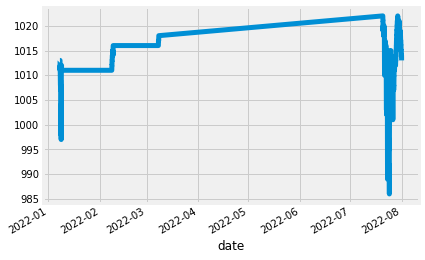

In [13]:
df.pres.plot()

Column name: co2


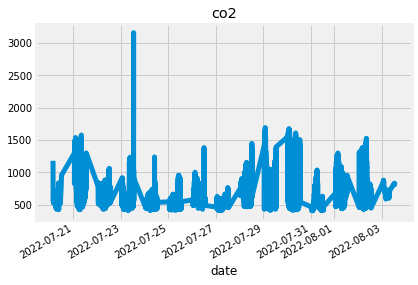

Column name: temp


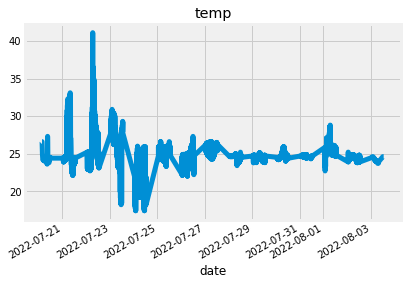

Column name: hum


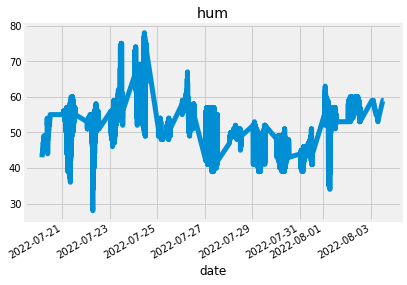

Column name: pres


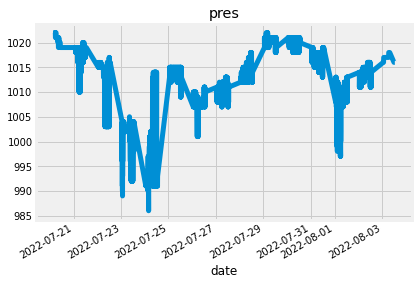

In [33]:
for col in df.columns:
    print("Column name:", col)
    df[col].plot(title=col)
    plt.show()

In [34]:
24*60/5

288.0

C:\Users\val-wd\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\val-wd\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\val-wd\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


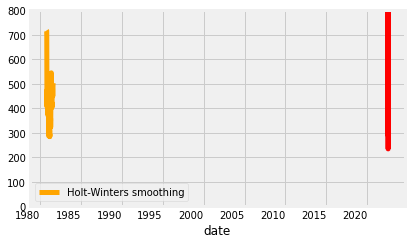

In [35]:
df.co2.plot.line()
fit1 = ExponentialSmoothing(df.co2, seasonal_periods=288, trend='add', seasonal='add')
fit1 = fit1.fit(smoothing_level=0.5) # ,use_boxcox=True)
fit1.fittedvalues.plot(color='red')
fit1.forecast(288).rename("Holt-Winters smoothing").plot(color='orange', legend=True)

plt.ylim(0, 800); plt.show()

In [36]:
# what to do when we have no answers / labels
# but want to look at outliers / clusters / segments
df.head()

,co2,temp,hum,pres
date,,,,
2022-07-20 03:20:03,1179,26.6,43,1022
2022-07-20 03:25:03,559,26.6,44,1022
2022-07-20 03:30:03,564,26.0,44,1022
2022-07-20 03:35:03,580,25.6,44,1022
2022-07-20 03:40:03,559,25.2,44,1022


In [41]:
X = [(n1,n2) for n1,n2 in zip(df.co2,df.temp)] # TODO use ndarray for this list is slower
X[:3]

[(1179, 26.6), (559, 26.6), (564, 26.0)]

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
# we have created a label for each data point
# it is up to you to determine the meaning of the labels

In [44]:
kmeans.labels_[:10]

array([1, 2, 2, 0, 2, 2, 2, 2, 2, 2])

In [45]:
df['labels'] = kmeans.labels_
df.head()

,co2,temp,hum,pres,labels
date,,,,,
2022-07-20 03:20:03,1179,26.6,43,1022,1
2022-07-20 03:25:03,559,26.6,44,1022,2
2022-07-20 03:30:03,564,26.0,44,1022,2
2022-07-20 03:35:03,580,25.6,44,1022,0
2022-07-20 03:40:03,559,25.2,44,1022,2


<AxesSubplot:xlabel='co2', ylabel='labels'>

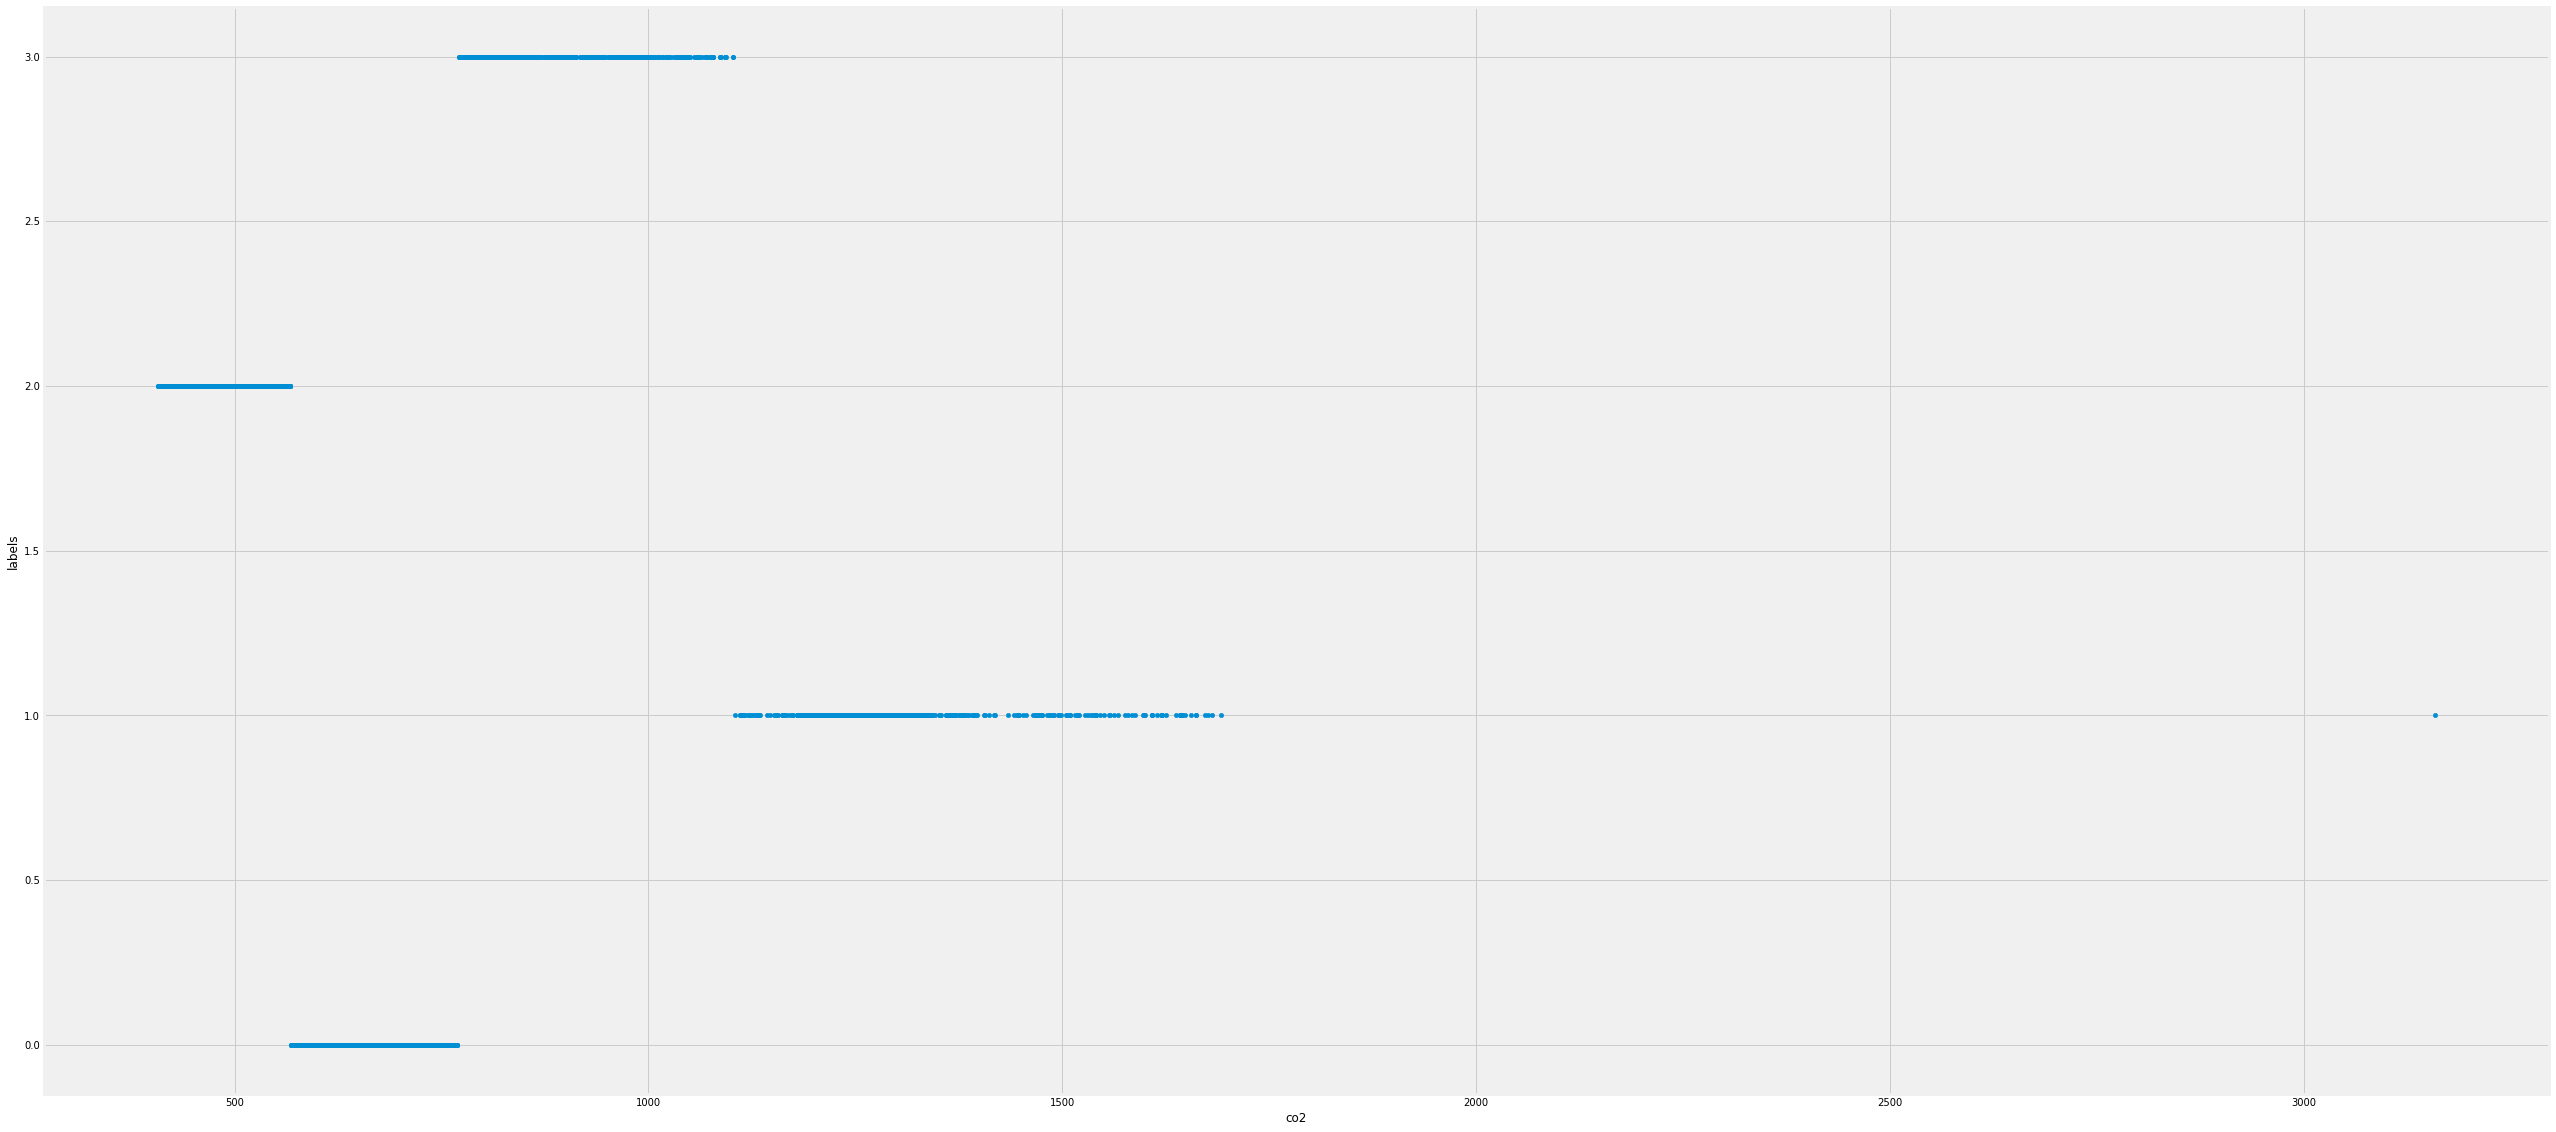

In [48]:
df.plot(kind='scatter', x='co2', y='labels', figsize=(CFG.img_dim1,CFG.img_dim2))

<AxesSubplot:xlabel='co2', ylabel='temp'>

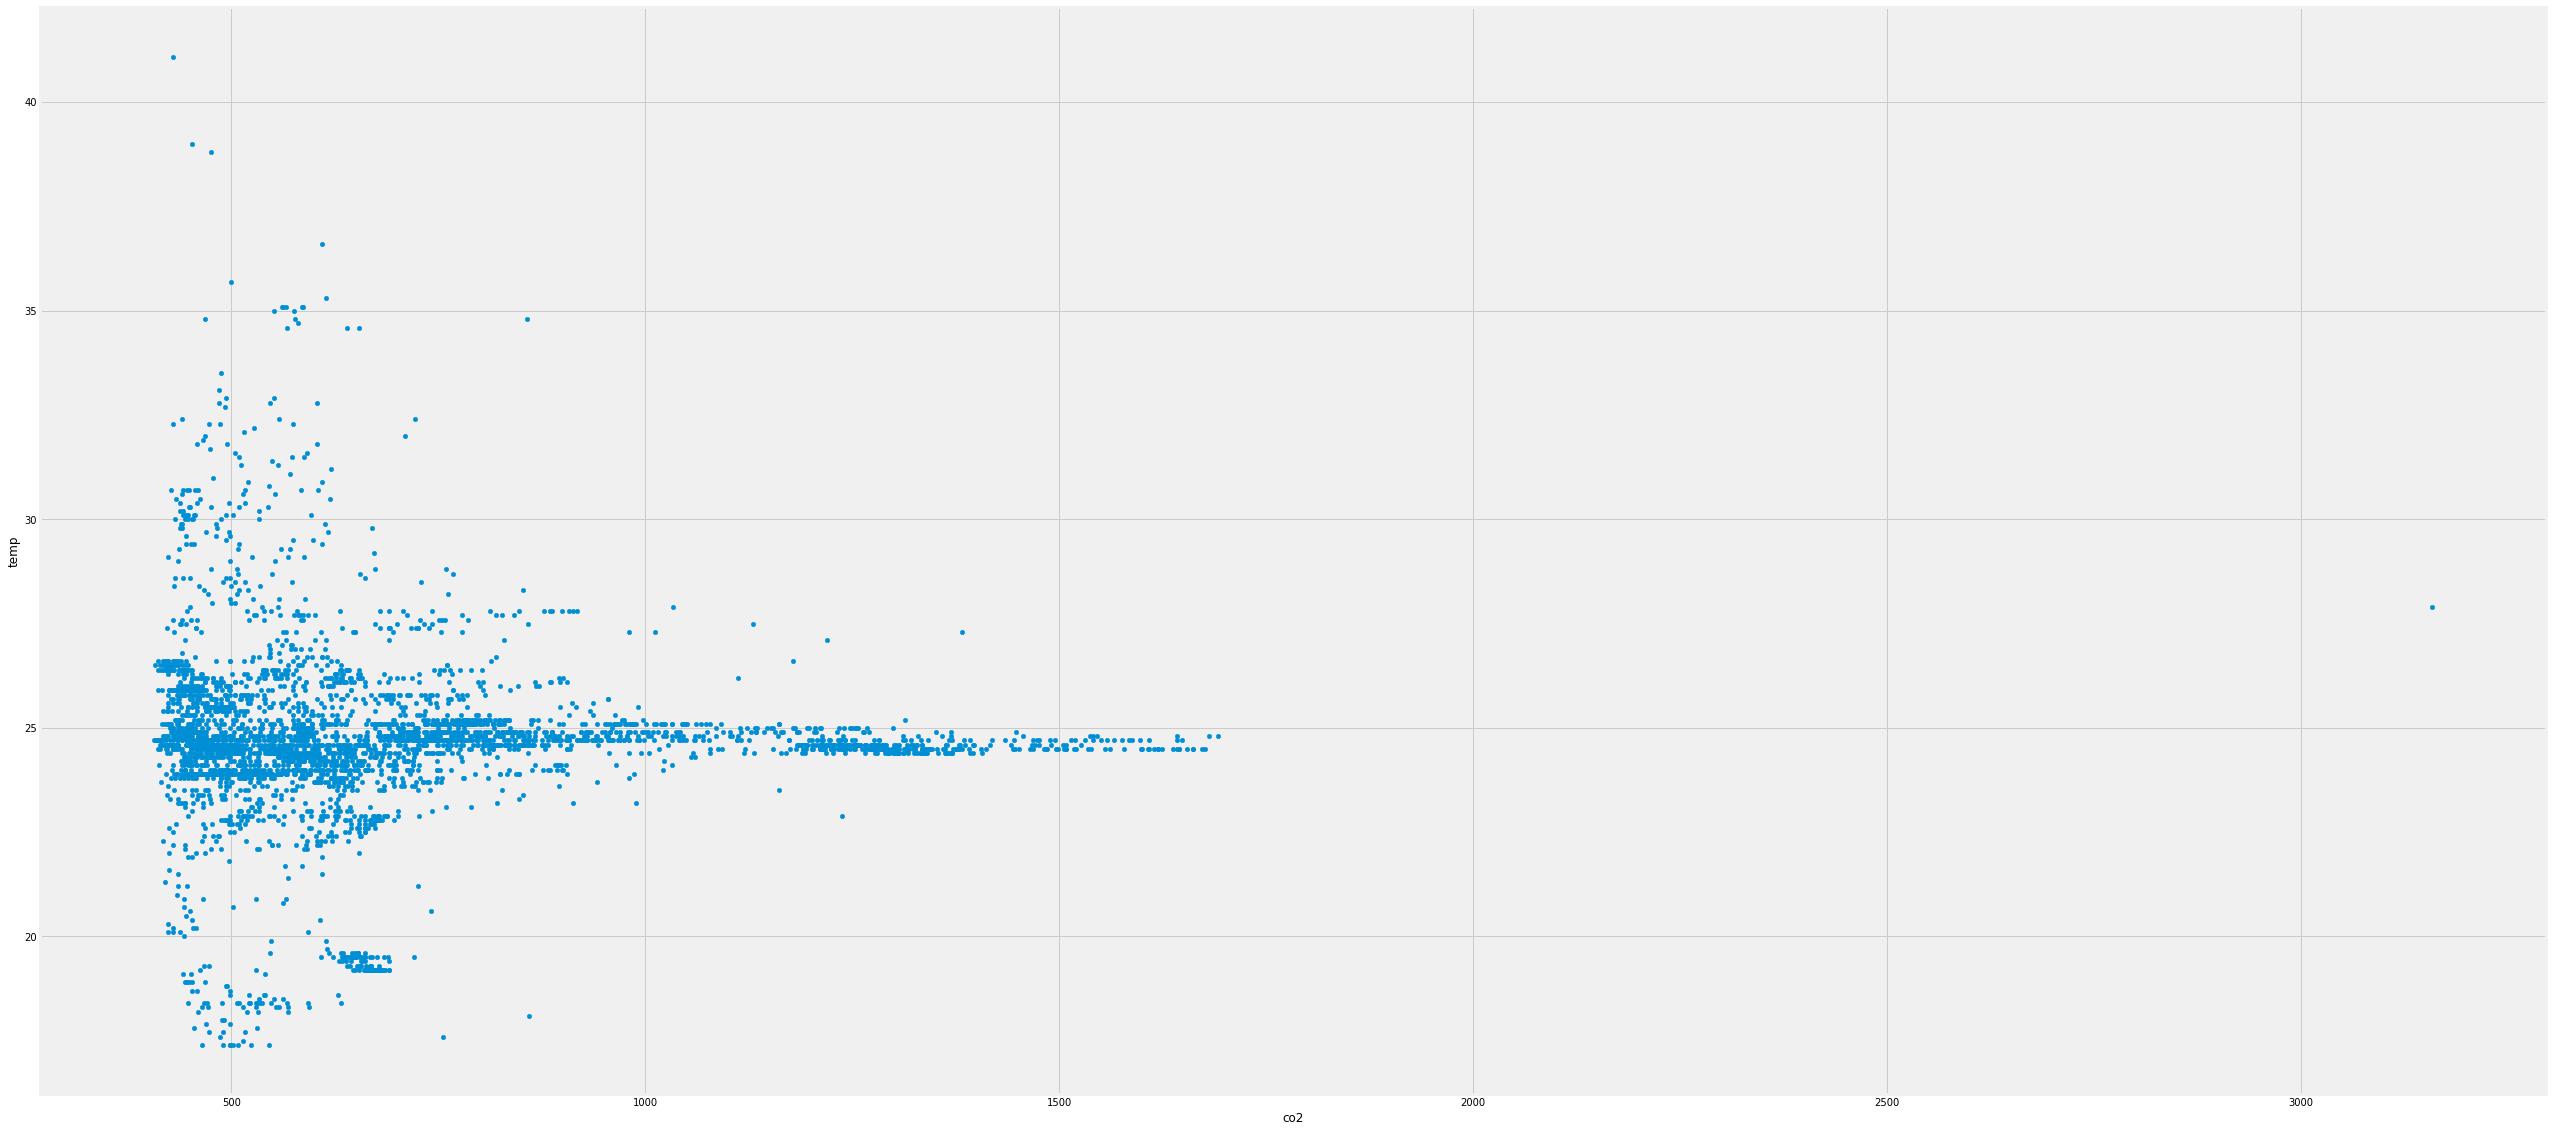

In [49]:
df.plot(kind='scatter', x='co2', y='temp', figsize=(CFG.img_dim1,CFG.img_dim2))

In [52]:
df.columns

Index(['co2', 'temp', 'hum', 'pres', 'labels'], dtype='object')

<AxesSubplot:xlabel='co2', ylabel='temp'>

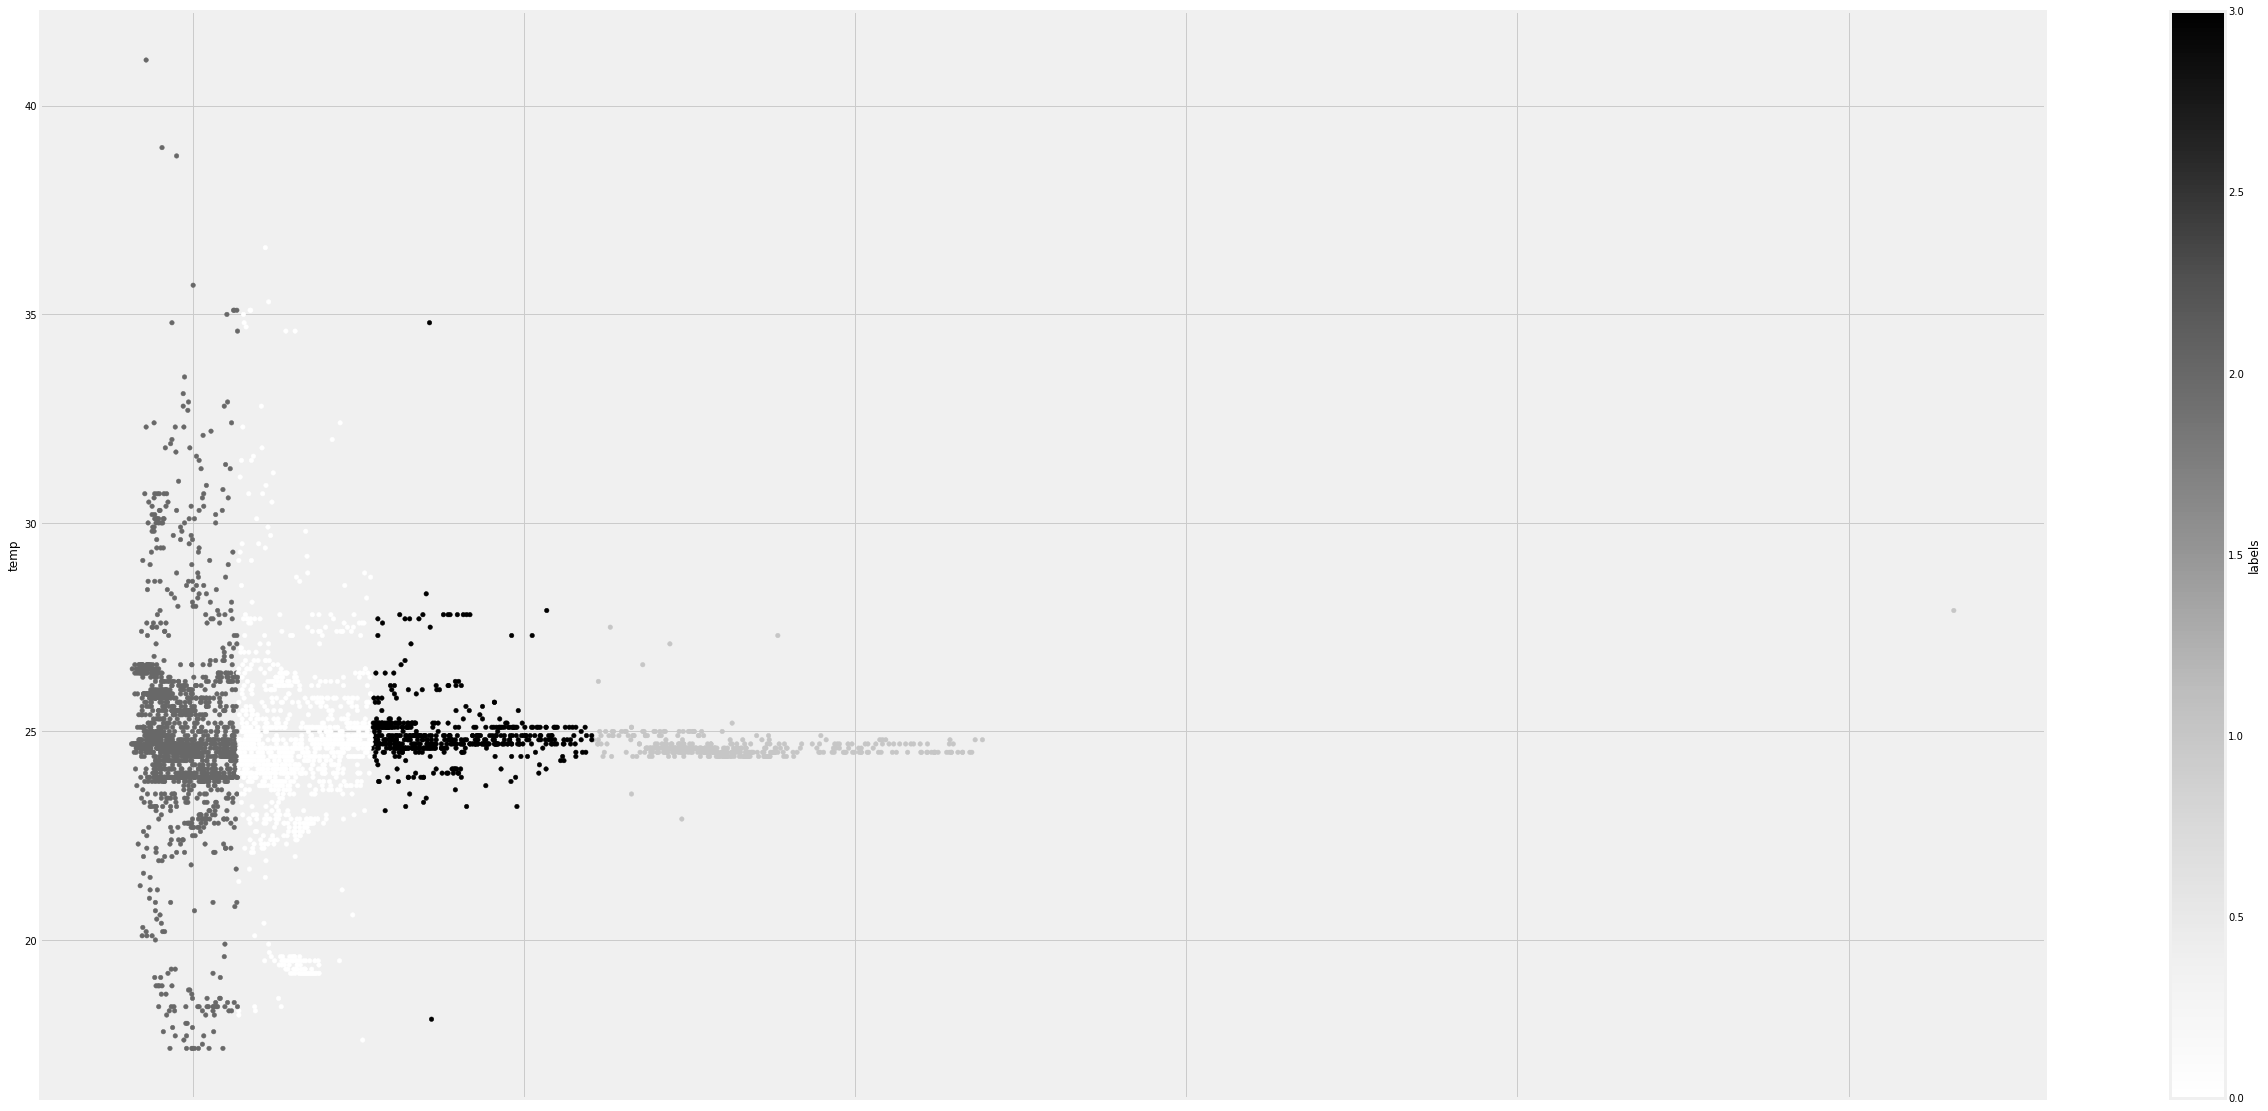

In [53]:
df.plot(kind='scatter', x='co2', y='temp', figsize=(CFG.img_dim1,CFG.img_dim2), c="labels"
)

In [50]:
import seaborn as sb

In [54]:
colors = ['red', 'green', 'blue', 'orange']
cmap = [colors[i] for i in df.labels]
cmap[:10]

['green',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

<AxesSubplot:xlabel='co2', ylabel='temp'>

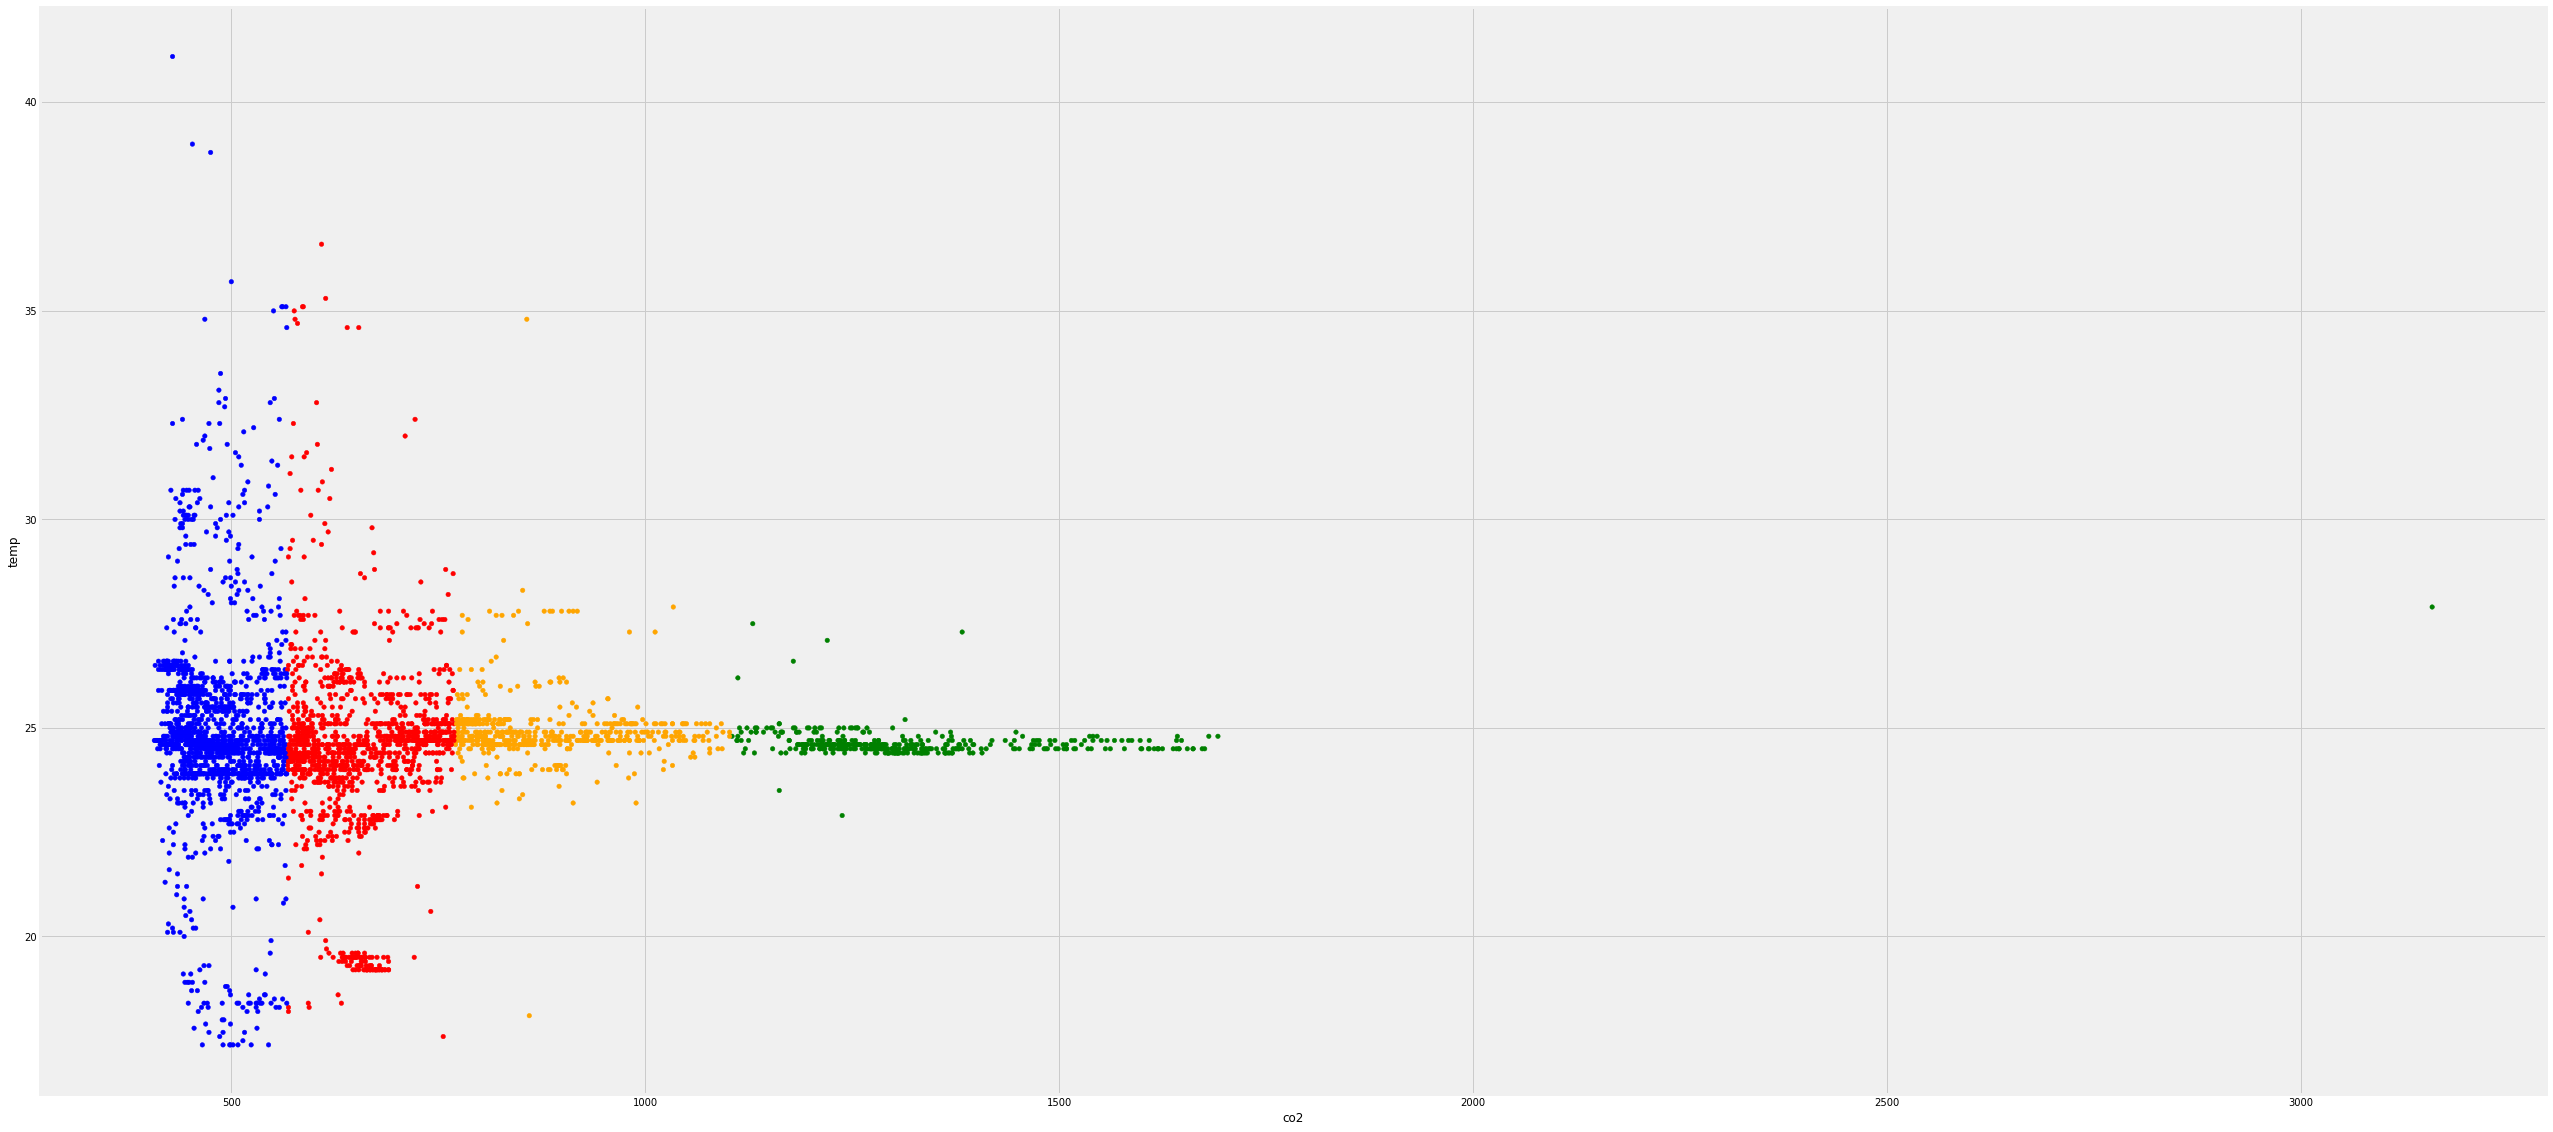

In [55]:
df.plot(kind='scatter', x='co2', y='temp', figsize=(CFG.img_dim1,CFG.img_dim2), c=cmap
)

In [ ]:
# looks like kmeans took atmospheric pressure as the primary factor
# most likely it is because we did not normalize data (for example both columns in range 0 1)
# we can normalize data using sklearn.preprocessing.MinMaxScaler
# next step would be to try segmenting normalized data

# after that we might want to try different kmeans values - that is different number of clusters
# after that we can look at advanced clustering methods such as spectral clustering
# and agglomerative clustering
# spectral clustering is a method that clusters data based on the similarity of the data
# spectral clustering at scikit learn is found at sklearn.cluster.spectral_clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.spectral_clustering.html

# this is just a start into non-supervised learning!